In [50]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns #Visualization
sns.set()

In [51]:
p=pd.read_excel("petrol_1.xlsx")

In [52]:
p.head(2)

,Petrol_tax,Average Income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [53]:
p.describe()

,Petrol_tax,Average Income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


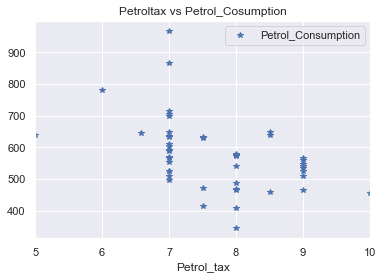

In [57]:

p.plot(x='Petrol_tax', y='Petrol_Consumption', style='*') 
plt.title('Petroltax vs Petrol_Cosumption')    
plt.show()  


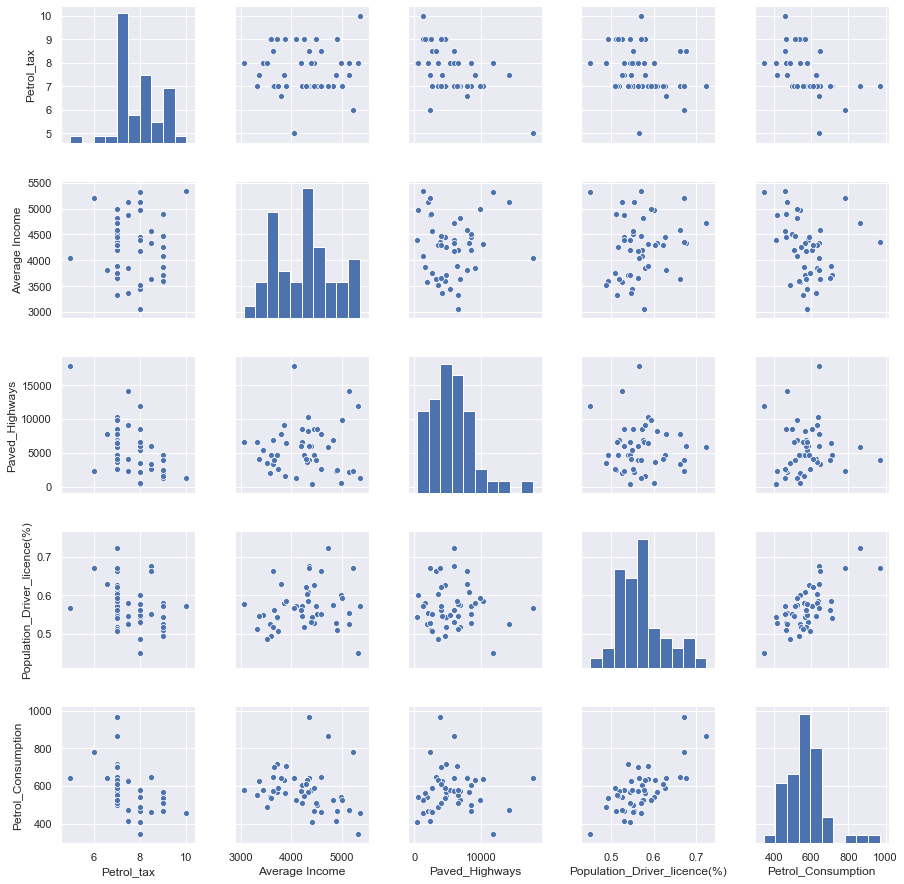

In [49]:
sns.pairplot(p)

## Preparing the Data
- Target variable :Petrol_Consumption
- features : rest

**X contains all the independent variables & y contains the target variable**

##  Correlation coefficient 
Is a measure of the association between two variables. It is used to find the relationship is between data and a measure to check how strong it is. The formulas return a value between -1 and 1 wherein one shows -1 shows negative correlation and +1 shows a positive correlation


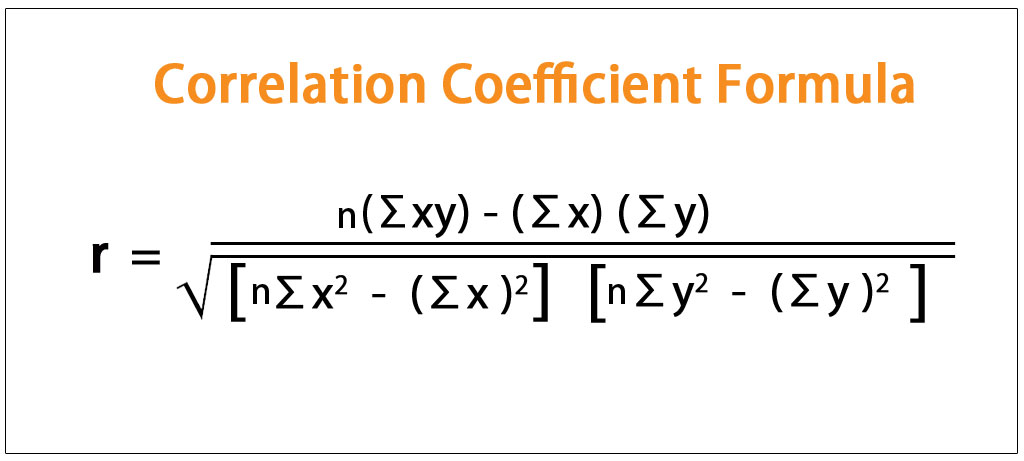

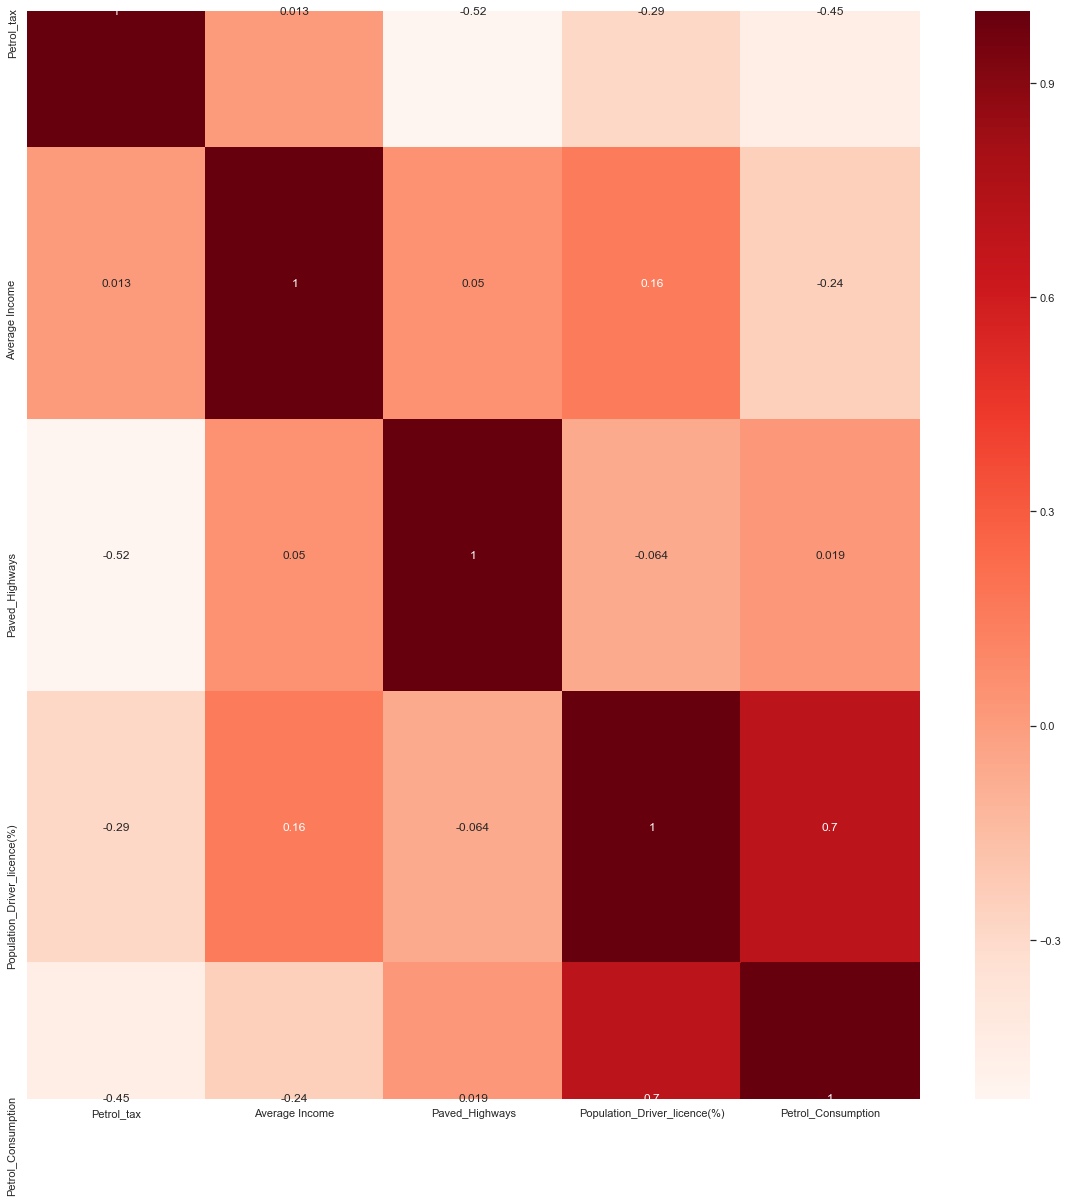

In [30]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(20,20))
cor = p.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [54]:
#Correlation with output variable
cor_target = abs(cor["Petrol_Consumption"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
Name: Petrol_Consumption, dtype: float64

In [35]:
X = p[['Petrol_tax',  
       'Population_Driver_licence(%)']]
y = p['Petrol_Consumption']  

In [36]:
## divide our data into training and test sets:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

## Training the Algorithm

To find the most fit feature by comparing regression cofficients . We will apply regression fit() to this data

In [37]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df  


,Coefficient
Petrol_tax,-32.895301
Population_Driver_licence(%),1398.260257


- This means that for a unit increase in "petroltax", there is a **decrease** of 33 million gallons in gas consumption. 
- A  unit increase in proportion of population with a drivers license results in an **increase** of 1.398 billion gallons of gas consumption. 
- We can see that **Averageincome** and **Paved_Highways** have a very little effect on the gas consumption.

## Making Predictions

In [39]:
y_pred = regressor.predict(X_test)  

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  


,Actual,Predicted
29,534,421.754809
4,410,525.961382
26,577,531.554423
30,571,522.501916
32,577,573.502231
37,704,617.583614
34,487,446.260548
40,587,673.514024
7,467,538.545725
10,580,506.385739


## Evaluating the Algorithm

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 66.14858697400142
Mean Squared Error: 5333.410251936051
Root Mean Squared Error: 73.03020095779588


## Conclusions:
- value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.


- Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
- Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.
    